# Loading Required Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set from google drive

In [ ]:
def load_data(path):
  return pd.read_csv(path)

In [ ]:
df = load_data("/content/drive/MyDrive/Colab Notebooks/ChurnAnalysisinTelecomIndustry/Dataset/churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [ ]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,Churn
count,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335,12335
unique,5590,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,1038-ZAGBI,Female,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,104,6216,6230,7974,10933,5952,4995,5773,5118,5173,5863,4592,4620,7058,7053,4013,6728


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
count,12335.000000,12335.000000,12335.000000,12335.000000
mean,0.157254,29.531543,61.502934,2032.263356
std,0.349871,23.342738,28.673113,2120.078007
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,8.000000,33.886556,352.743728
50%,0.000000,24.000000,64.364917,1209.250000
75%,0.000000,49.000000,85.000000,3168.750000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.Churn.value_counts()

No     6728
Yes    5607
Name: Churn, dtype: int64

In [ ]:
6728/12335, 5607/12335

(0.5454398054316985, 0.4545601945683016)

We have 55% data labels from negative side and 45% data labels from positive side. It is imbalanced but not that much.

In [ ]:
df.drop("customerID", axis = 1, inplace=True)  #dropping customerID as it is of no use.

## Histogram for numerical attributes

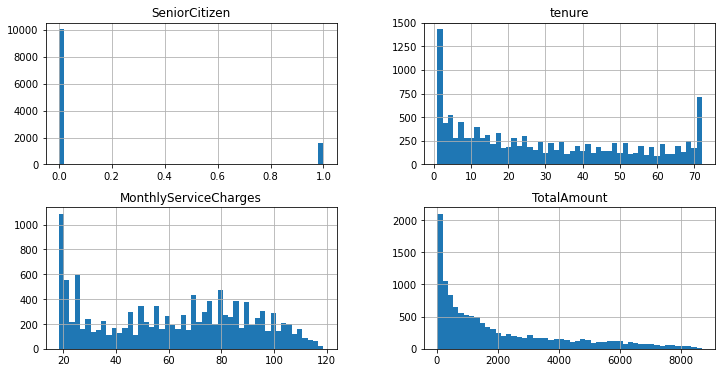

In [ ]:
df.hist(bins=50, figsize=(12,6))
plt.show()

# Handling Senior Citizen
•	SeniorCitizen: This column describes whether a customer is a senior citizen or not. Value of this column is "Yes" or "No". Values in SeniorCitizen is totally different than what is mentioned in data dict, so iam going to handle that first.

In [ ]:
df[["SeniorCitizen"]]

,SeniorCitizen
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
12330,0.357423
12331,0.000000
12332,0.000000
12333,0.660002


In [ ]:
df.SeniorCitizen.value_counts()

0.000000    10016
1.000000     1566
0.189941        1
0.141733        1
0.889594        1
            ...  
0.750185        1
0.573709        1
0.329219        1
0.224610        1
0.771432        1
Name: SeniorCitizen, Length: 755, dtype: int64

In [ ]:
def cng_senior_citizen(SeniorCitizen):
  if SeniorCitizen > 0.5:
    return 1
  else:
    return 0  

In [ ]:
df["SeniorCitizen"]  = df["SeniorCitizen"].apply(cng_senior_citizen)

In [ ]:
df.SeniorCitizen.value_counts()

0    10394
1     1941
Name: SeniorCitizen, dtype: int64

## Creating Test Set

In [ ]:
def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.3)

In [ ]:
train_set.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
10199,Female,0,Yes,No,17.775518,Yes,No,DSL,No internet service,No,No internet service,No internet service,No,No internet service,One year,Yes,Mailed check,53.690482,920.698114,Yes
1568,Male,0,No,No,18.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.250000,331.350000,No
462,Female,0,No,No,59.000000,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),99.450000,5623.700000,No
743,Female,0,Yes,Yes,60.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.250000,1103.250000,No
222,Male,0,No,No,7.000000,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,74.900000,490.550000,No


##  Discover and Visualize the Data to Gain Insights

In [ ]:
#First, make sure we have put the test set aside and we are only exploring the training set
churn = train_set.copy()

In [ ]:
#loading plotly and important tools

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

#setting plotly to offline
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

#to visualize graphs done by plotly in colab

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
# we have to run configure_plotly_browser_state everytime we want see graphs on colab

In [ ]:
#categorical attributes
cat_attributes = churn.dtypes[churn.dtypes=="object"].index
cat_attributes

Index(['gender', 'Partner', 'Dependents', 'CallService', 'MultipleConnections',
       'InternetConnection', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtectionService', 'TechnicalHelp', 'OnlineTV', 'OnlineMovies',
       'Agreement', 'BillingMethod', 'PaymentMethod', 'Churn'],
      dtype='object')

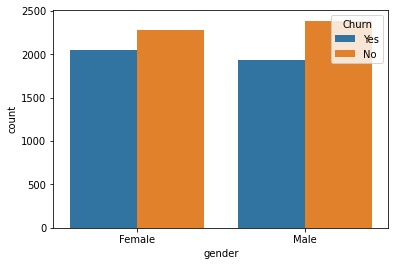

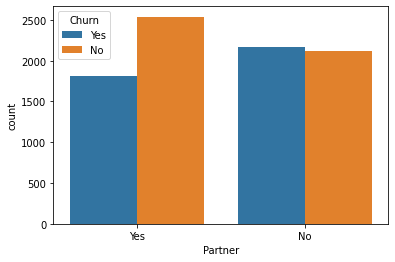

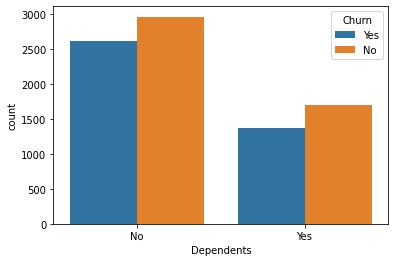

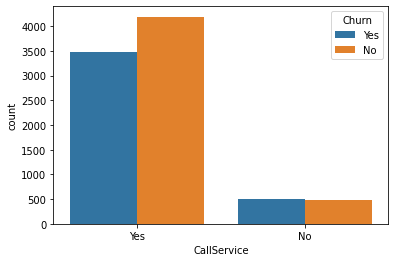

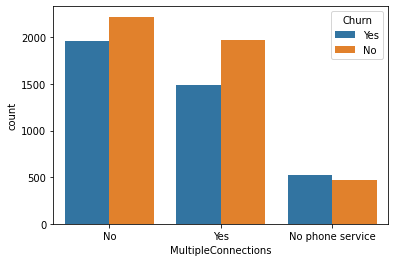

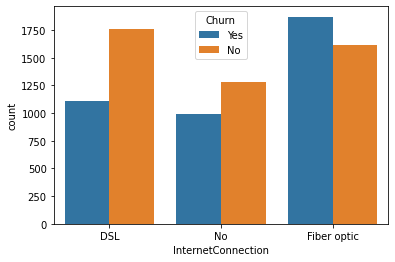

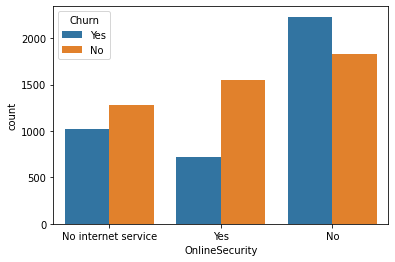

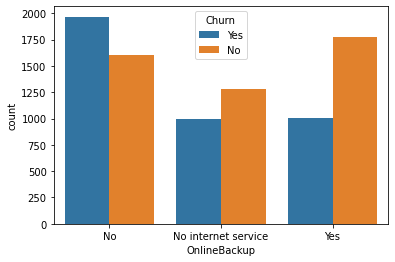

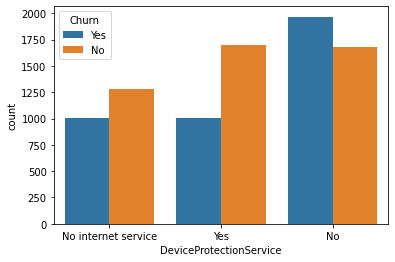

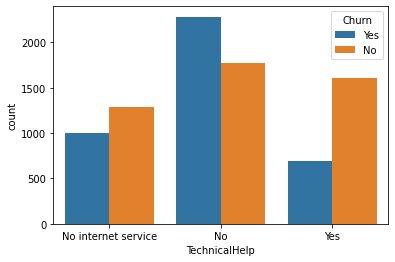

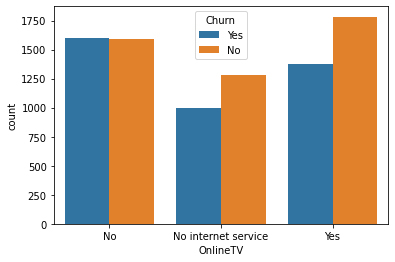

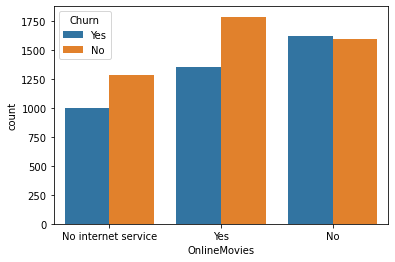

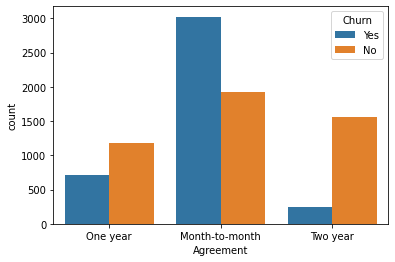

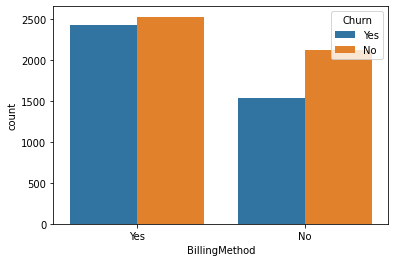

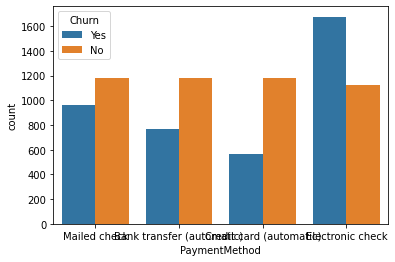

In [ ]:
#Count plot for all categorical attribute

import warnings
warnings.filterwarnings("ignore")

for attribute in cat_attributes:
  if attribute == "Churn":
    continue
  sns.countplot(attribute, data = churn, hue = "Churn")
  plt.show()

In [ ]:
churn.PaymentMethod.value_counts()

Electronic check             2799
Mailed check                 2142
Bank transfer (automatic)    1952
Credit card (automatic)      1742
Name: PaymentMethod, dtype: int64

In [ ]:
numerical_attribute = churn.dtypes[churn.dtypes=="float64"].index
numerical_attribute

Index(['tenure', 'MonthlyServiceCharges', 'TotalAmount'], dtype='object')

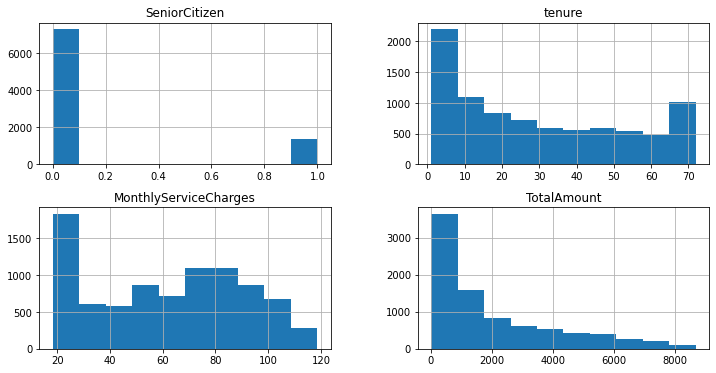

In [ ]:
churn.hist(figsize=(12,6))
plt.show()

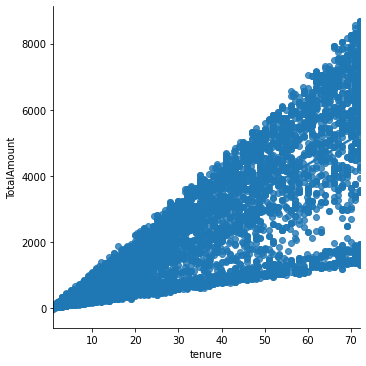

In [ ]:
sns.lmplot(x  = "tenure", y = "TotalAmount", data = churn)

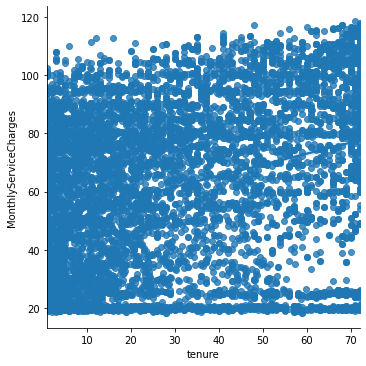

In [ ]:
sns.lmplot(x  = "tenure", y = "MonthlyServiceCharges", data = churn)

MonthlyServiceCharges is not changing with tenure, it is constant. Its shows that it does not matter whether people are with company for longer period or smaller period, people generally not changing their plan.

In [ ]:
tenure_churn_no = churn[churn.Churn=='No'].tenure
tenure_churn_yes = churn[churn.Churn=='Yes'].tenure

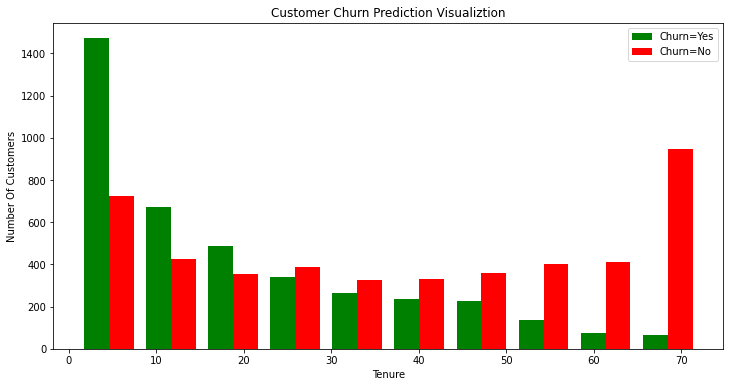

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no], color = ["green","red"], label=["Churn=Yes", "Churn=No"])
plt.legend()

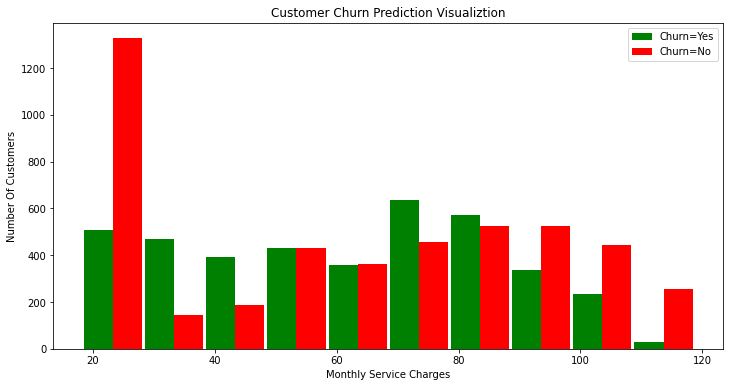

In [ ]:
mc_churn_no = churn[churn.Churn=='No'].MonthlyServiceCharges      
mc_churn_yes = churn[churn.Churn=='Yes'].MonthlyServiceCharges      

plt.figure(figsize=(12,6))
plt.xlabel("Monthly Service Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Looking correlation

In [ ]:
corr_matrix = churn.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
SeniorCitizen,1.000000,0.037858,0.232304,0.117318
tenure,0.037858,1.000000,0.309046,0.836847
MonthlyServiceCharges,0.232304,0.309046,1.000000,0.673250
TotalAmount,0.117318,0.836847,0.673250,1.000000


In [ ]:
corr_matrix["tenure"].sort_values(ascending=True)

SeniorCitizen            0.037858
MonthlyServiceCharges    0.309046
TotalAmount              0.836847
tenure                   1.000000
Name: tenure, dtype: float64

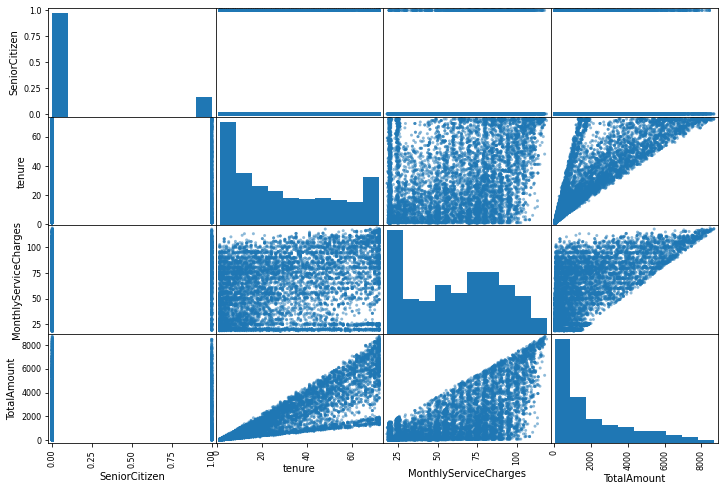

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["SeniorCitizen", "tenure", "MonthlyServiceCharges", "TotalAmount"]
scatter_matrix(churn[attributes], figsize=(12, 8))
plt.show()

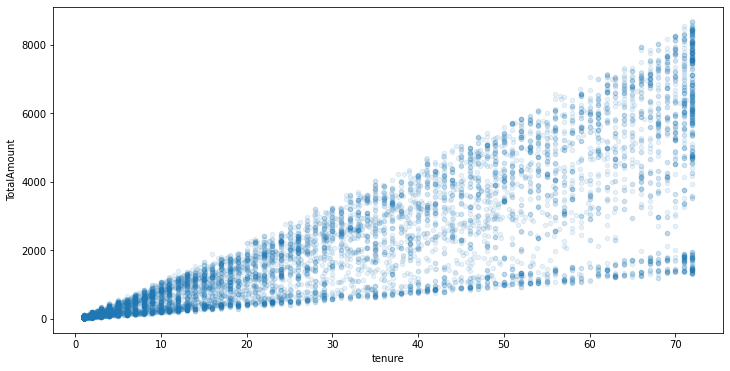

In [ ]:
churn.plot(kind="scatter", x="tenure", y="TotalAmount",alpha=0.1, figsize = (12,6))

## Prepare the Data for Machine Learning Algorithms

In [ ]:
churn = train_set.drop("Churn", axis=1)
churn_labels = train_set["Churn"].copy()

### Data Cleaning

In [ ]:
churn.isnull().sum()

gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
dtype: int64

In [ ]:
churn_labels.isnull().sum()

0

We don't have any null values presnt.

In [ ]:
for column in churn:
  print(f'{column} : {churn[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [17.77551755 18.         59.         ... 18.55840572  7.27893537
 46.74253076]
CallService : ['Yes' 'No']
MultipleConnections : ['No' 'Yes' 'No phone service']
InternetConnection : ['DSL' 'No' 'Fiber optic']
OnlineSecurity : ['No internet service' 'Yes' 'No']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtectionService : ['No internet service' 'Yes' 'No']
TechnicalHelp : ['No internet service' 'No' 'Yes']
OnlineTV : ['No' 'No internet service' 'Yes']
OnlineMovies : ['No internet service' 'Yes' 'No']
Agreement : ['One year' 'Month-to-month' 'Two year']
BillingMethod : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Electronic check']
MonthlyServiceCharges : [53.6904819  19.25       99.45       ... 64.71077634 67.31285678
 74.15087318]
TotalAmount : [ 920.698114   331.35      5623.7       ...  445.1085494 3371.133444


In [ ]:
def print_unique_col_value(df):
 for column in df:
   if df[column].dtypes == 'object':
     print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_value(churn)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
CallService : ['Yes' 'No']
MultipleConnections : ['No' 'Yes' 'No phone service']
InternetConnection : ['DSL' 'No' 'Fiber optic']
OnlineSecurity : ['No internet service' 'Yes' 'No']
OnlineBackup : ['No' 'No internet service' 'Yes']
DeviceProtectionService : ['No internet service' 'Yes' 'No']
TechnicalHelp : ['No internet service' 'No' 'Yes']
OnlineTV : ['No' 'No internet service' 'Yes']
OnlineMovies : ['No internet service' 'Yes' 'No']
Agreement : ['One year' 'Month-to-month' 'Two year']
BillingMethod : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Electronic check']


In [ ]:
churn.replace('No phone service', 'No', inplace = True)
churn.replace('No internet service', 'No', inplace = True)

In [ ]:
print_unique_col_value(churn)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
CallService : ['Yes' 'No']
MultipleConnections : ['No' 'Yes']
InternetConnection : ['DSL' 'No' 'Fiber optic']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['No' 'Yes']
DeviceProtectionService : ['No' 'Yes']
TechnicalHelp : ['No' 'Yes']
OnlineTV : ['No' 'Yes']
OnlineMovies : ['No' 'Yes']
Agreement : ['One year' 'Month-to-month' 'Two year']
BillingMethod : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Electronic check']


## Convert Yes-No to 1-0

In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'CallService', 'MultipleConnections','OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtectionService','TechnicalHelp', 'OnlineTV', 'OnlineMovies','BillingMethod']

for col in yes_no_columns:
    churn[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for column in churn:
  print(f'{column} : {churn[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [17.77551755 18.         59.         ... 18.55840572  7.27893537
 46.74253076]
CallService : [1 0]
MultipleConnections : [0 1]
InternetConnection : ['DSL' 'No' 'Fiber optic']
OnlineSecurity : [0 1]
OnlineBackup : [0 1]
DeviceProtectionService : [0 1]
TechnicalHelp : [0 1]
OnlineTV : [0 1]
OnlineMovies : [0 1]
Agreement : ['One year' 'Month-to-month' 'Two year']
BillingMethod : [1 0]
PaymentMethod : ['Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Electronic check']
MonthlyServiceCharges : [53.6904819  19.25       99.45       ... 64.71077634 67.31285678
 74.15087318]
TotalAmount : [ 920.698114   331.35      5623.7       ...  445.1085494 3371.133444
 1730.35     ]


In [ ]:
churn['gender'].replace({'Female':1,'Male':0},inplace=True)

## One hot encoding for categorical columns


In [ ]:
churn = pd.get_dummies(data=churn, columns=['InternetConnection','Agreement','PaymentMethod'])
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'CallService', 'MultipleConnections', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtectionService', 'TechnicalHelp', 'OnlineTV', 'OnlineMovies',
       'BillingMethod', 'MonthlyServiceCharges', 'TotalAmount',
       'InternetConnection_DSL', 'InternetConnection_Fiber optic',
       'InternetConnection_No', 'Agreement_Month-to-month',
       'Agreement_One year', 'Agreement_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,BillingMethod,MonthlyServiceCharges,TotalAmount,InternetConnection_DSL,InternetConnection_Fiber optic,InternetConnection_No,Agreement_Month-to-month,Agreement_One year,Agreement_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
10199,1,0,1,0,17.775518,1,0,0,0,0,0,0,0,1,53.690482,920.698114,1,0,0,0,1,0,0,0,0,1
1568,0,0,0,0,18.000000,1,0,0,0,0,0,0,0,0,19.250000,331.350000,0,0,1,1,0,0,0,0,0,1
462,1,0,0,0,59.000000,1,1,1,1,1,0,0,1,1,99.450000,5623.700000,0,1,0,1,0,0,1,0,0,0
743,1,0,1,1,60.000000,1,0,0,0,0,0,0,0,1,19.250000,1103.250000,0,0,1,0,0,1,0,1,0,0
222,0,0,0,0,7.000000,1,0,0,0,1,0,0,0,1,74.900000,490.550000,0,1,0,1,0,0,0,0,1,0


In [ ]:
churn.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
CallService                                  int64
MultipleConnections                          int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtectionService                      int64
TechnicalHelp                                int64
OnlineTV                                     int64
OnlineMovies                                 int64
BillingMethod                                int64
MonthlyServiceCharges                      float64
TotalAmount                                float64
InternetConnection_DSL                       uint8
InternetConnection_Fiber optic               uint8
InternetConnection_No                        uint8
Agreement_Month-to-month       

## Scalling Down Numerical attributes


In [ ]:
cols_to_scale = ['tenure','MonthlyServiceCharges','TotalAmount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn[cols_to_scale] = scaler.fit_transform(churn[cols_to_scale])

In [ ]:
churn.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,BillingMethod,MonthlyServiceCharges,TotalAmount,InternetConnection_DSL,InternetConnection_Fiber optic,InternetConnection_No,Agreement_Month-to-month,Agreement_One year,Agreement_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5380,1,0,0,0,0.225352,1,0,0,0,0,0,0,0,0,0.017928,0.036817,0,0,1,0,1,0,0,1,0,0
7502,0,0,0,0,0.704225,1,1,0,0,1,0,0,0,0,0.615040,0.487367,0,1,0,1,0,0,0,1,0,0
9382,1,0,0,1,0.037862,1,1,0,0,0,0,0,0,1,0.203147,0.011776,1,0,0,1,0,0,1,0,0,0
3196,1,0,0,0,0.802817,1,1,1,1,1,1,0,0,1,0.526394,0.493927,1,0,0,0,1,0,0,1,0,0
3606,1,0,1,0,0.943662,1,1,0,0,1,0,1,0,1,0.714143,0.687224,0,1,0,0,0,1,1,0,0,0


In [ ]:
for col in churn:
    print(f'{col}: {churn[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.2362749  0.23943662 0.81690141 ... 0.24730149 0.08843571 0.644261  ]
CallService: [1 0]
MultipleConnections: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [0 1]
DeviceProtectionService: [0 1]
TechnicalHelp: [0 1]
OnlineTV: [0 1]
OnlineMovies: [0 1]
BillingMethod: [1 0]
MonthlyServiceCharges: [0.35299285 0.00996016 0.80876494 ... 0.46275674 0.48867387 0.55678161]
TotalAmount: [0.104068   0.03606067 0.64676694 ... 0.04918775 0.38683392 0.1974971 ]
InternetConnection_DSL: [1 0]
InternetConnection_Fiber optic: [0 1]
InternetConnection_No: [0 1]
Agreement_Month-to-month: [0 1]
Agreement_One year: [1 0]
Agreement_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [0 1]
PaymentMethod_Mailed check: [1 0]


## Churn_labels --> Target Attribute

In [ ]:
churn_labels.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
churn_labels.replace({'Yes':1,'No':0},inplace=True)

In [ ]:
churn_labels.unique()

array([1, 0])

### Making X_train and Y_train

In [ ]:
X_train = churn.copy()
Y_train = churn_labels.copy()

# Same data cleansing approach for test data set

In [ ]:
test_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,OnlineBackup,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
12258,Male,0,No,No,58.803169,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),98.537258,6156.987679,Yes
9543,Female,1,Yes,Yes,26.120287,Yes,No,No,No internet service,No internet service,No internet service,No,No internet service,Yes,One year,No,Bank transfer (automatic),57.938336,1707.641567,Yes
2218,Male,0,No,Yes,10.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.950000,219.500000,No
4308,Male,0,Yes,No,63.000000,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),79.800000,5034.050000,No
11667,Male,0,Yes,No,5.450076,Yes,Yes,No,No,No internet service,No,No,No internet service,Yes,Month-to-month,Yes,Electronic check,39.113984,270.703696,Yes


In [ ]:
churn_test = test_set.drop("Churn", axis = 1) 
churn_test_labels = test_set["Churn"].copy()

In [ ]:
def data_cleansing_pipline(data, data_labels):

  data.replace('No phone service', 'No', inplace = True)       #replacing No phone service to No
  data.replace('No internet service', 'No', inplace = True)    #replacig No internet service to No 

  #columns which has yes and no values only
  #will change yes-1 and No-0
  yes_no_columns = ['Partner', 'Dependents', 'CallService', 'MultipleConnections','OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtectionService','TechnicalHelp', 'OnlineTV', 'OnlineMovies','BillingMethod']


  for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)


  data['gender'].replace({'Female':1,'Male':0},inplace=True)  #replacing Female with 1 & Male with 0

  #creating dummy attribute for features which has more than 2 categories
  data = pd.get_dummies(data=data, columns=['InternetConnection','Agreement','PaymentMethod'])

  #columns which need to be scaled down
  cols_to_scale = ['tenure','MonthlyServiceCharges','TotalAmount']

  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


  #changing target labels to 1 and 0
  data_labels.replace({'Yes':1,'No':0},inplace=True)

  return data, data_labels

In [ ]:
X_test,Y_test = data_cleansing_pipline(churn_test,churn_test_labels)

In [ ]:
for col in X_test:
    print(f'{col}: {X_test[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [0 1]
tenure: [0.81412914 0.35380686 0.12676056 ... 0.23152385 0.39839281 0.5828829 ]
CallService: [1 0]
MultipleConnections: [1 0]
OnlineSecurity: [0 1]
OnlineBackup: [0 1]
DeviceProtectionService: [1 0]
TechnicalHelp: [0 1]
OnlineTV: [0 1]
OnlineMovies: [1 0]
BillingMethod: [0 1]
MonthlyServiceCharges: [0.79827602 0.39309717 0.01397206 ... 0.16564148 0.12888181 0.63961908]
TotalAmount: [0.70931777 0.19515945 0.02319253 ... 0.05538703 0.05827599 0.48432164]
InternetConnection_DSL: [0 1]
InternetConnection_Fiber optic: [1 0]
InternetConnection_No: [0 1]
Agreement_Month-to-month: [1 0]
Agreement_One year: [0 1]
Agreement_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [1 0]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [0 1]
PaymentMethod_Mailed check: [0 1]


In [ ]:
Y_test.unique()

array([1, 0])

In [ ]:
print("Dimension of X_train is: ", X_train.shape)
print("Dimension of Y_train is: ", Y_train.shape)
print("Dimension of X_test is: ", X_test.shape)
print("Dimension of Y_test is: ", Y_test.shape)

Dimension of X_train is:  (8635, 26)
Dimension of Y_train is:  (8635,)
Dimension of X_test is:  (3700, 26)
Dimension of Y_test is:  (3700,)


# Select and train a Machine Learning model

### Training and Evaluating on the Training Set

### Model 1: SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict(X_train)[:5]

array([0, 0, 0, 0, 1])

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

## Performance Measures


In [ ]:
#Measuring Accuracy Using Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.69774175, 0.7104806 , 0.67342212, 0.6821077 , 0.68731905])

In [ ]:
#prediction 
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=5)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_train_pred)
cm

array([[2940, 1722],
       [ 953, 3020]])

Text(69.0, 0.5, 'Truth')

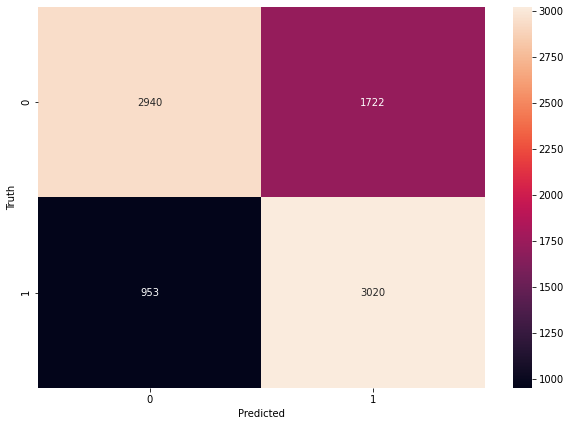

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#classification report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      4662
           1       0.64      0.76      0.69      3973

    accuracy                           0.69      8635
   macro avg       0.70      0.70      0.69      8635
weighted avg       0.70      0.69      0.69      8635



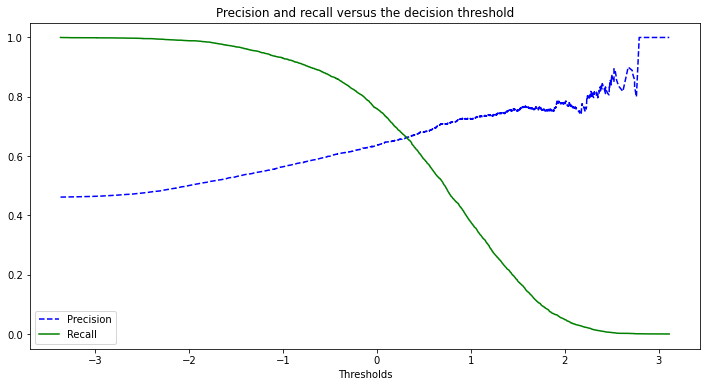

In [ ]:
#Precision-Recall Tradeoff

Y_scores = cross_val_predict(sgd_clf, X_train, Y_train, cv=5, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores)

#Finally, we can plot precision and recall as functions of the threshold value using Matplotlib

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(12,6))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.title("Precision and recall versus the decision threshold")
  plt.xlabel("Thresholds")
  plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'Precision')

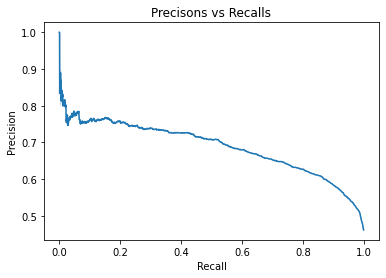

In [ ]:
#plot precision directly against recall

sns.lineplot(x = recalls, y = precisions)
plt.title("Precisons vs Recalls")
plt.xlabel("Recall")
plt.ylabel("Precision")

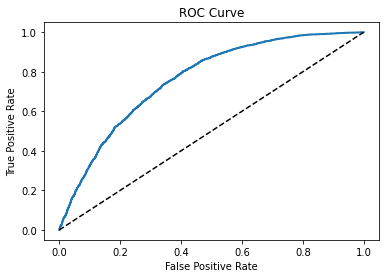

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
#AUC: Area Under Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_scores)

0.7608238384729702

### Model 2: RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
forest_clf.predict(X_train)[:5]

array([1, 0, 0, 0, 0])

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

## Performance Measure

### Measuring Accuracy Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.86797915, 0.85639838, 0.83555298, 0.86045165, 0.85350318])

### Prediction

In [ ]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(forest_clf, X_train, Y_train, cv=5)

### Confusion_matrix

Text(69.0, 0.5, 'Truth')

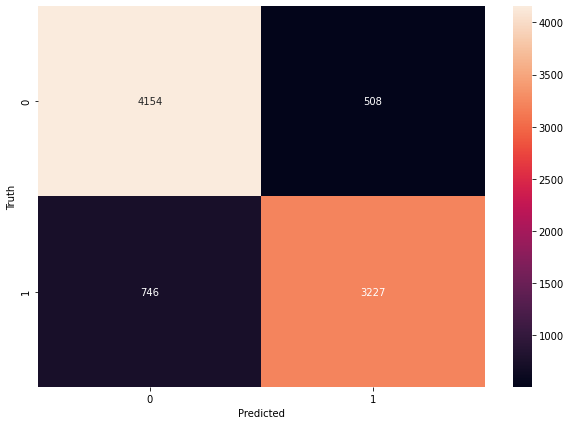

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_train_pred)
cm

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4662
           1       0.86      0.81      0.84      3973

    accuracy                           0.85      8635
   macro avg       0.86      0.85      0.85      8635
weighted avg       0.86      0.85      0.85      8635



### Precision-Recall Tradeoff

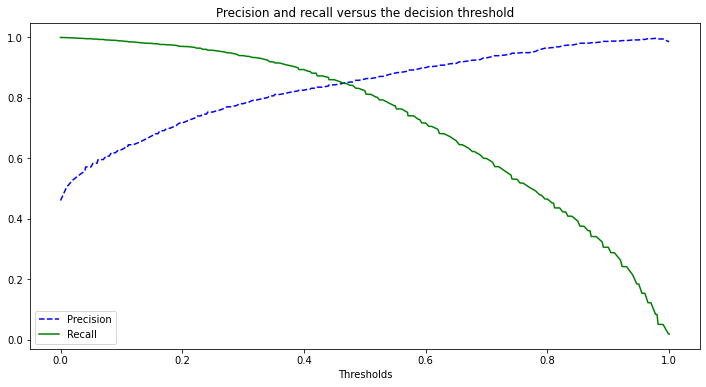

In [ ]:
Y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=5,method="predict_proba")

#To plot a ROC curve or Precision-Recall Curve, we need scores, not probabilities. Here  i am going to use the positive class’s probability as the score:

Y_scores_forest = Y_probas_forest[:, 1] # score = proba of positive class

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores_forest)

#Finally, we can plot precision and recall as functions of the threshold value using Matplotlib

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(12,6))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.title("Precision and recall versus the decision threshold")
  plt.xlabel("Thresholds")
  plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Plot precision directly against recall


Text(0, 0.5, 'Precision')

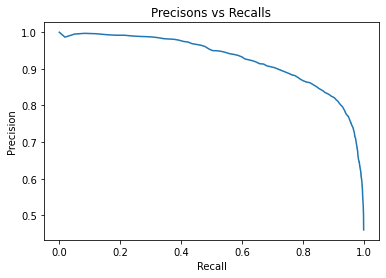

In [ ]:
sns.lineplot(x = recalls, y = precisions)
plt.title("Precisons vs Recalls")
plt.xlabel("Recall")
plt.ylabel("Precision")

### ROC Curve

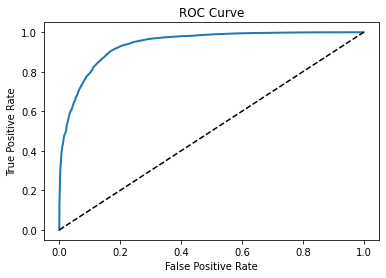

In [ ]:
from sklearn.metrics import roc_curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train, Y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")


plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

### AUC: Area Under Curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_scores_forest)

0.9386804192995988

## ROC Curve of both SGD and RandomForest

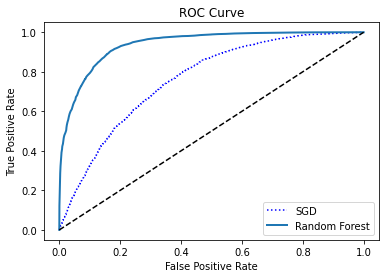

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

### Model:3 XGboost

In [ ]:
import xgboost
xgb_clf=xgboost.XGBClassifier(random_state=100)

In [ ]:
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_clf.predict(X_train)[:5]

array([0, 0, 0, 0, 1])

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

## Performance Measure

### Measuring Accuracy Using Cross-Validation



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_clf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.81297047, 0.80775912, 0.78575565, 0.80718008, 0.79617834])

### Prediction

In [ ]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(xgb_clf, X_train, Y_train, cv=5)

### Confusion Matrix

Text(69.0, 0.5, 'Truth')

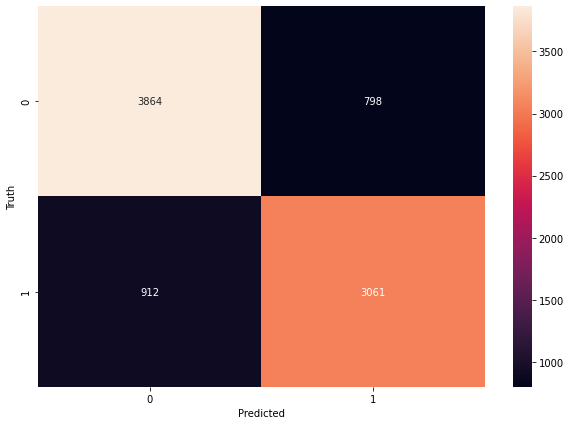

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_train_pred)
cm

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4662
           1       0.79      0.77      0.78      3973

    accuracy                           0.80      8635
   macro avg       0.80      0.80      0.80      8635
weighted avg       0.80      0.80      0.80      8635



### Precision-Recal Tradeoff

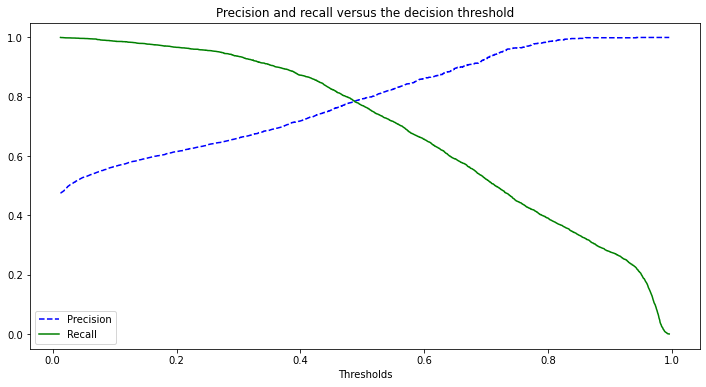

In [ ]:
Y_probas_xgb = cross_val_predict(xgb_clf, X_train, Y_train, cv=5,method="predict_proba")

#To plot a ROC curve or Precision-Recall Curve, we need scores, not probabilities. Here  i am going to use the positive class’s probability as the score:

Y_scores_xgb = Y_probas_xgb[:, 1] # score = proba of positive class

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores_xgb)

#Finally, we can plot precision and recall as functions of the threshold value using Matplotlib

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(12,6))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.title("Precision and recall versus the decision threshold")
  plt.xlabel("Thresholds")
  plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### ROC Curve

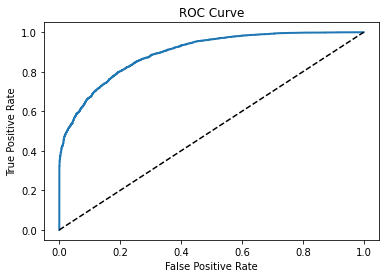

In [ ]:
from sklearn.metrics import roc_curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_train, Y_scores_xgb)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")


plot_roc_curve(fpr_xgb, tpr_xgb)
plt.show()


### AUC: Area Under Curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_scores_xgb)

0.8952317082822998

### ROC Curve of SGD, RandomForest & XGBoost

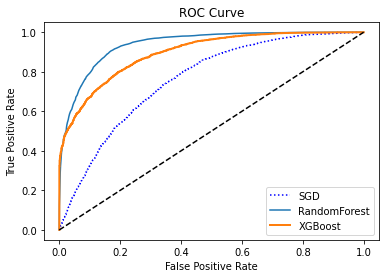

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest,  label = "RandomForest")
plot_roc_curve(fpr_xgb, tpr_xgb, label = "XGBoost")
plt.legend(loc="lower right")
plt.show()

As we can clearly see from ROC Curve that Random Forest is performing well than other classifiers. Also AUC of Random Forest is maximum. The precision and recll of both classes in  Random Forest classifier is above 80%, Also F1 score is good for both classes in case of Random Forest. 

- Now i am going to Try Artificial Neural Network for this problem statement and also fine tune Random Forest & XGBoost model and see if able to increase performance.

Classification Report of Random Forest Model:

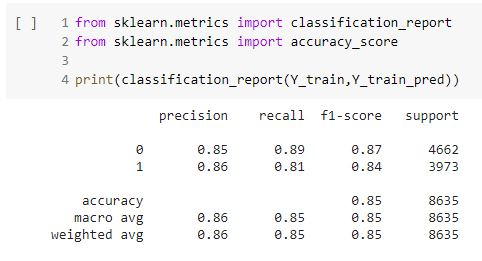

### Model 4: Arificial Neural Netwrok

In [ ]:
#Build a model (ANN) in tensorflow/keras

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 0.6186 - accuracy: 0.6511
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7345
Epoch 3/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7550
Epoch 4/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7673
Epoch 5/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7763
Epoch 6/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7837
Epoch 7/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7861
Epoch 8/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.7913
Epoch 9/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.7926
Epoch 10/100
270/270 [==============================] - 0s 2ms/step - loss: 0.4006 - accura

### Performance Measure

In [ ]:
model.evaluate(X_train, Y_train)

270/270 [==============================] - 0s 994us/step - loss: 0.2666 - accuracy: 0.8840


[0.26655903458595276, 0.8839606046676636]

In [ ]:
ann_pred = model.predict(X_train)
ann_pred[:5]

array([[5.6004041e-01],
       [2.2022426e-03],
       [3.1532675e-02],
       [6.2083054e-05],
       [7.3111051e-01]], dtype=float32)

In [ ]:
Y_pred = []
for element in ann_pred:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [ ]:
Y_pred[:5]

[1, 0, 0, 0, 1]

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

### Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4662
           1       0.94      0.80      0.86      3973

    accuracy                           0.88      8635
   macro avg       0.89      0.88      0.88      8635
weighted avg       0.89      0.88      0.88      8635



### Confusion Matrix

Text(69.0, 0.5, 'Truth')

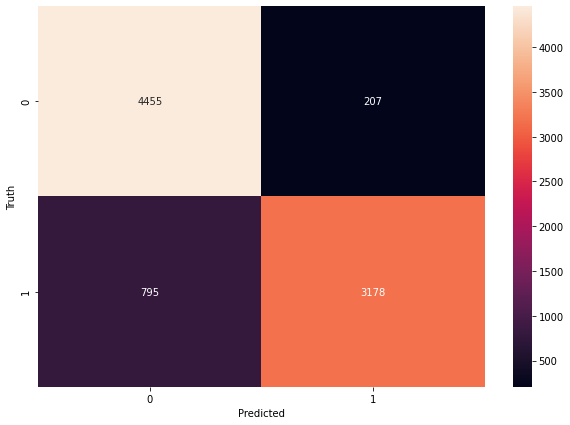

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_train,predictions=Y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Fine-Tune Model

### XGBoost Model

In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
classifier_xgb = xgboost.XGBClassifier()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
xgb_randomcv = RandomizedSearchCV(classifier_xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
xgb_randomcv.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
#best model from random search cv
xgb_model = xgb_randomcv.best_estimator_

In [ ]:
#making prediction
xgb_predictions = xgb_model.predict(X_train)
xgb_predictions[:5]

array([1, 0, 0, 0, 0])

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

In [ ]:
#getting the probabilities of our predictions
xgb_prob = xgb_model.predict_proba(X_train)
xgb_scores = xgb_prob[:,1]

### Performance Measure

### Confusion Matrix

Text(69.0, 0.5, 'Truth')

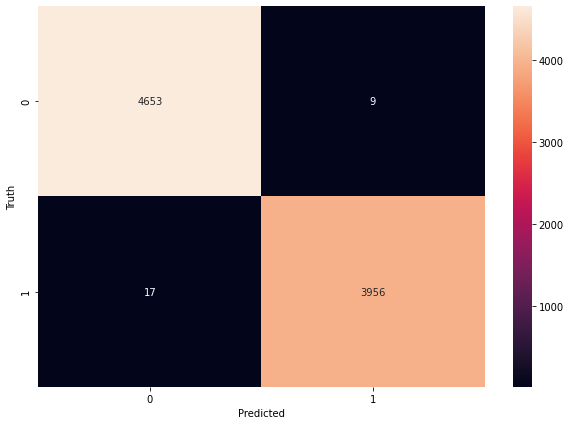

In [ ]:
cm = confusion_matrix(Y_train,xgb_predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [ ]:
print(accuracy_score(Y_train,xgb_predictions))
print(classification_report(Y_train,xgb_predictions))

0.9969889982628836
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4662
           1       1.00      1.00      1.00      3973

    accuracy                           1.00      8635
   macro avg       1.00      1.00      1.00      8635
weighted avg       1.00      1.00      1.00      8635



In [ ]:
xgb_model.score(X_train,Y_train)

0.9969889982628836

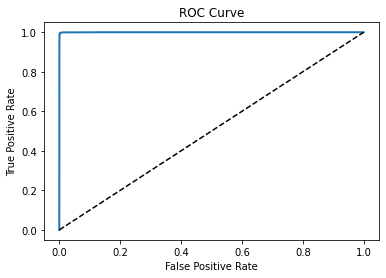

In [ ]:
from sklearn.metrics import roc_curve
fpr_xgb_random, tpr_xgb_random, thresholds_xgb_random = roc_curve(Y_train, xgb_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")


plot_roc_curve(fpr_xgb_random, tpr_xgb_random)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, xgb_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.999873394663226


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Create the parameter grid 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the random search model
rf_randomcv = RandomizedSearchCV(rf,param_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
rf_randomcv.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#best model from random search cv
rf_model = rf_randomcv.best_estimator_

In [ ]:
#making prediction
rf_predictions = rf_model.predict(X_train)
rf_predictions[:5]

array([1, 0, 0, 0, 1])

In [ ]:
Y_train[:5]

10199    1
1568     0
462      0
743      0
222      0
Name: Churn, dtype: int64

In [ ]:
#getting the probabilities of our predictions
rf_prob = rf_model.predict_proba(X_train)
rf_scores = rf_prob[:,1]

### Performance Measure

### Confusion Matrix

Text(69.0, 0.5, 'Truth')

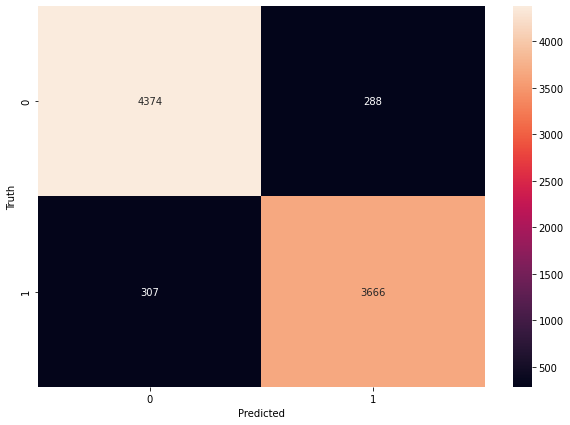

In [ ]:
cm = confusion_matrix(Y_train,rf_predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report

In [ ]:
print(accuracy_score(Y_train,rf_predictions))
print(classification_report(Y_train,rf_predictions))

0.9310943833236827
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4662
           1       0.93      0.92      0.92      3973

    accuracy                           0.93      8635
   macro avg       0.93      0.93      0.93      8635
weighted avg       0.93      0.93      0.93      8635



### ROC Curve

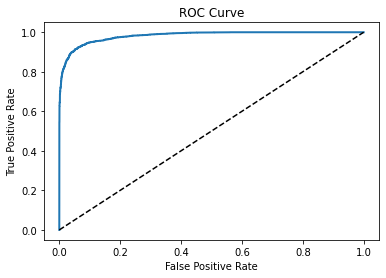

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf_random, tpr_rf_random, thresholds_rf_random = roc_curve(Y_train, rf_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

plot_roc_curve(fpr_rf_random, tpr_rf_random)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, rf_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9818419602587738


Till now  i have trained training data set into various model such as SGd, RandomForest, XGBoost and ANN. Also i Fine Tune my xgboost and random forest model. And i have decide to go forward with random forest model,which i have obtained after randomsreach cv. 

- Now let's test this model on test data set.

## Evaluating model on test data set

### Prediction on test data set

In [ ]:
prediction_on_test = rf_model.predict(X_test)
prediction_on_test[:5]

array([0, 1, 0, 0, 1])

In [ ]:
Y_test[:5]

12258    1
9543     1
2218     0
4308     0
11667    1
Name: Churn, dtype: int64

### Confusion Matrix on test data set

Text(69.0, 0.5, 'Truth')

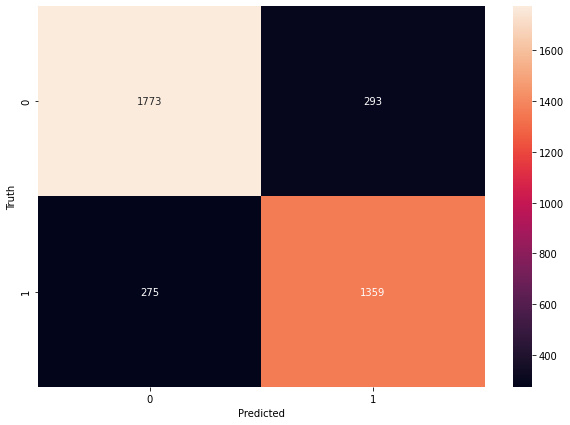

In [ ]:
cm = confusion_matrix(Y_test,prediction_on_test)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classification Report on test data set

In [ ]:
print(accuracy_score(Y_test,prediction_on_test))
print(classification_report(Y_test,prediction_on_test))

0.8464864864864865
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2066
           1       0.82      0.83      0.83      1634

    accuracy                           0.85      3700
   macro avg       0.84      0.84      0.84      3700
weighted avg       0.85      0.85      0.85      3700



In [ ]:
#getting the probabilities of our predictions
rf_prob = rf_model.predict_proba(X_test)
rf_test_scores = rf_prob[:,1]

### ROC Curve on test data set

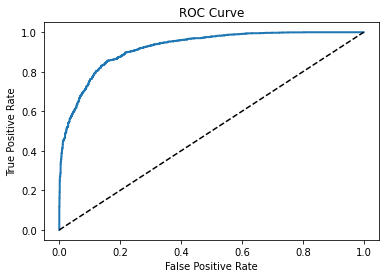

In [ ]:
from sklearn.metrics import roc_curve
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(Y_test, rf_test_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

plot_roc_curve(fpr_rf_test, tpr_rf_test)
plt.show()

### Area Under Curve on test data set

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_test, rf_test_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9222940988979348


Finally i get good performance in random forest model obtained by random search cv on test data set also. 

### Selected Model : rf_model (RandomForest Model obtained by RandomSearchCv)

Classification Report on train data set:

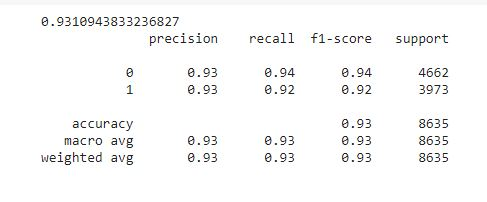


Classification Report on test data set:


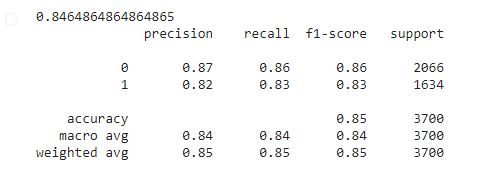





### Deployment